In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus']=False

In [16]:
df=pd.read_csv('CNKI.csv',encoding='gbk')
df.head()

,Title-题名,Author-作者,Organ-单位,Source-文献来源,Keyword-关键词,Summary-摘要,PubTime-发表时间
0,应用金融科技创新服务小微企业的途径与机制研究,李慧;,中国工商银行股份有限公司天津市分行;,第三十四届中国（天津）2020’IT、网络、信息技术、电子、仪器仪表创新学术会议论文集,融资困境;;金融科技;;小微企业,"近些年来,人工智能、区块链、云计算和大数据成为了各行各业的焦点,传统金融业包括商业银行在内,...",2020-08-17
1,金融科技研究进展与评析,鲁钊阳;张珂瑞;,西南政法大学经济学院;,金融理论与实践,金融科技;;金融创新;;金融发展,"从历史的角度来看,金融科技的产生是数百年来技术变革的必然产物,大数据、区块链、云计算、人工智...",2020-08-12
2,打造科技创新引擎 赋能业务价值创造,陈满才;,中国工商银行金融科技部;,中国金融电脑,云计算平台;物联网;人工智能技术;普惠金融发展;服务实体经济;工作体制机制;产学研用;银行业...,"当前,金融科技已逐渐从后台走向前台,成为推动金融转型升级的新引擎、金融服务实体经济的新途径、...",2020-08-07
3,新兴技术创新应用重塑金融服务 助力金融业数字化战略转型,赵希同;,中国银行信息科技部;,中国金融电脑,监管效能;新兴技术;区块链;差异化优势;容错纠错机制;数字化转型;创新应用;金融业;银行业;...,"面对金融竞争的新常态,商业银行要顺势而为、及时转型,利用新兴技术撬动金融创新,构建以客户为中...",2020-08-07
4,"发力新技术创新,为金融服务注入新动能",寇冠;,中信银行信息技术管理部;,中国金融电脑,中信银行;技术服务平台;物联网;平台体系;科技创新工作;区块链;人工智能;供应链金融;数字货...,"中信银行秉承""新技术驱动、价值导向""的科技创新理念,兼顾互联网""快""和银行""稳""的特点,重点...",2020-08-07


## 作者合作网络

In [8]:
authors=[]
keywords={}

for keys in df['Author-作者']:
    key_list=keys.split(';')
    for key in key_list:
        if key=='':
            continue
        if key in keywords:
            keywords[key]+=1
        else:
            keywords[key]=1
        if key not in authors:
            authors.append(key)


In [9]:
l=len(authors)
arr=np.zeros((l,l))
co_author_arr=pd.DataFrame(arr,index=authors,columns=authors)
co_author_arr.head()

,李慧,鲁钊阳,张珂瑞,陈满才,赵希同,寇冠,史晨阳,吴华晖,卢河英,薛洪言,...,葛秀楠,综合凤凰科技和中新网的报道整理,刘曙峰,于跃,舒文琼,韩倩倩,秦谊,许高攀,曾文华,吴学谋
李慧,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
鲁钊阳,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
张珂瑞,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
陈满才,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
赵希同,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
leg=len(authors)
count=0
for index,row in co_author_arr.iterrows():
    for name in row.index:
        if name!=index:
            row[name]+=1
            row[name]+=co_author_arr.loc[name,index]
    count+=1
    print('\r{}%'.format(count/leg*100),end='')
    

100.0%

In [11]:
co_author_arr.head()

,李慧,鲁钊阳,张珂瑞,陈满才,赵希同,寇冠,史晨阳,吴华晖,卢河英,薛洪言,...,葛秀楠,综合凤凰科技和中新网的报道整理,刘曙峰,于跃,舒文琼,韩倩倩,秦谊,许高攀,曾文华,吴学谋
李慧,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
鲁钊阳,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
张珂瑞,2.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
陈满才,2.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
赵希同,2.0,2.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## 建立聚类表格

In [12]:
keywords=[]
for keys in df['Keyword-关键词']:
    key_list=keys.split(';')
    for key in key_list:
        if key=='':
            continue
        if key not in keywords:
            keywords.append(key)
            
title=df['Title-题名']
arr=np.zeros((len(title),len(keywords)))
tit_key=pd.DataFrame(arr,index=title,columns=keywords)
tit_key.head()

,融资困境,金融科技,小微企业,金融创新,金融发展,云计算平台,物联网,人工智能技术,普惠金融发展,服务实体经济,...,金融危机,危机根源,第四次科技革命,泛系资源,泛通,交通,通信,网络,泛系数学,泛系史学
Title-题名,,,,,,,,,,,,,,,,,,,,,
应用金融科技创新服务小微企业的途径与机制研究,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
金融科技研究进展与评析,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
打造科技创新引擎 赋能业务价值创造,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
新兴技术创新应用重塑金融服务 助力金融业数字化战略转型,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"发力新技术创新,为金融服务注入新动能",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df=df.set_index('Title-题名')
for index,row in tit_key.iterrows():
    kw=df.loc[index,'Keyword-关键词']
    try:
        keys=kw.split(';')
        for k in keys:
            if k in keywords:
                row[k]=1
    except:
        pass

tit_key.head()   

,融资困境,金融科技,小微企业,金融创新,金融发展,云计算平台,物联网,人工智能技术,普惠金融发展,服务实体经济,...,金融危机,危机根源,第四次科技革命,泛系资源,泛通,交通,通信,网络,泛系数学,泛系史学
Title-题名,,,,,,,,,,,,,,,,,,,,,
应用金融科技创新服务小微企业的途径与机制研究,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
金融科技研究进展与评析,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
打造科技创新引擎 赋能业务价值创造,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
新兴技术创新应用重塑金融服务 助力金融业数字化战略转型,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"发力新技术创新,为金融服务注入新动能",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 使用轮廓系数评估

正在构建模型:100.0%

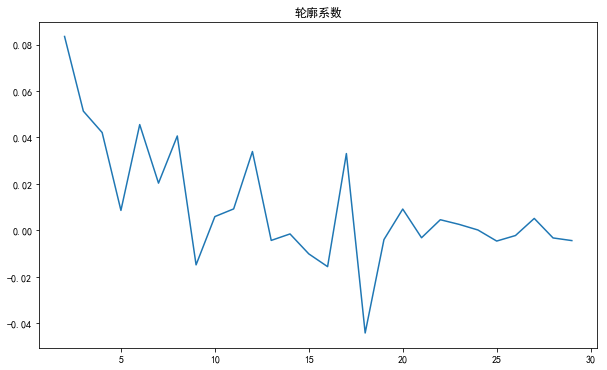

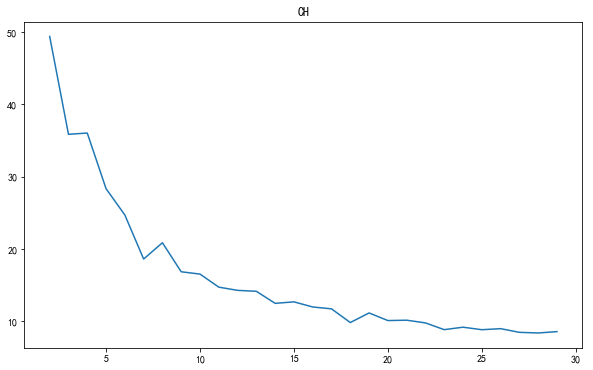

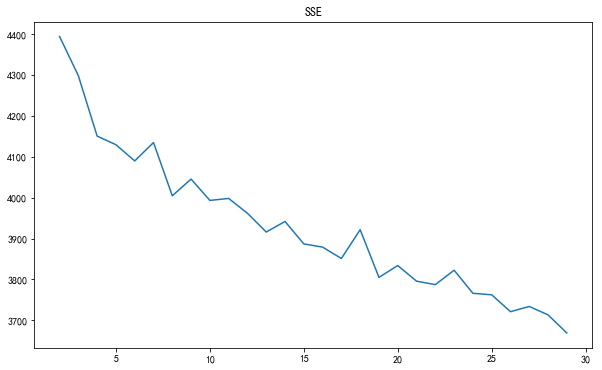

In [11]:
from sklearn.cluster import KMeans   
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabaz_score


#评价指标
silhouettteScore = []
CH_score=[]
SSE=[]
for i in range(2,30):
    ##构建并训练模型
    print('\r正在构建模型:{}%'.format((i-1)/28*100),end='')
    kmeans = KMeans(n_clusters = i,random_state=123).fit(tit_key)
    score = silhouette_score(tit_key,kmeans.labels_)
    ch=calinski_harabaz_score(tit_key,kmeans.labels_)
    
    silhouettteScore.append(score)
    CH_score.append(ch)
    SSE.append(kmeans.inertia_)
def plot_one(scores,title):
    plt.figure(figsize=(10,6))
    plt.plot(range(2,30),scores,linewidth=1.5, linestyle="-")
    plt.title(title)
plot_one(silhouettteScore,'轮廓系数')
plot_one(CH_score,'CH')
plot_one(SSE,'SSE')

- 由上图选取k=16作为评价指标

## 数据降维并可视化

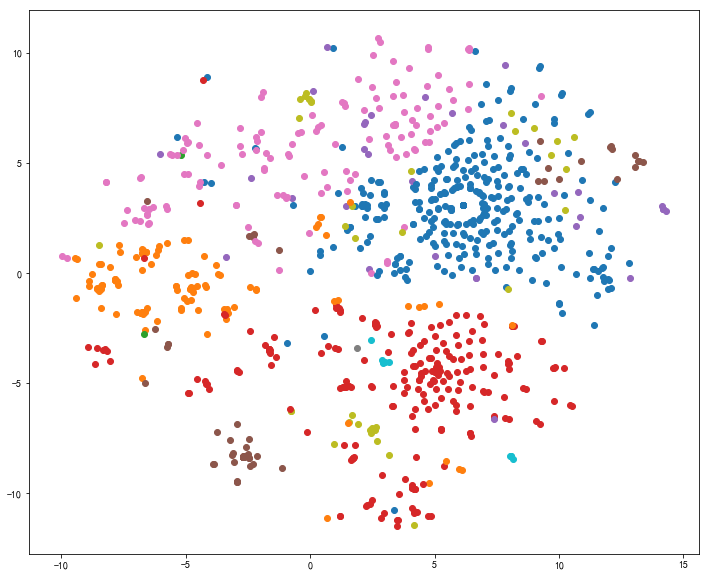

In [12]:
from sklearn.manifold import TSNE


kmeans=KMeans(n_clusters=16,random_state=123).fit(tit_key) #构建并训练模型

tsne = TSNE(n_components=2,init='random',random_state=177).fit(tit_key)
result=pd.DataFrame(tsne.embedding_)       ##将原始数据转换为DataFrame
result['labels'] = kmeans.labels_          ##将聚类结果存储进df数据表
 

# ## 绘制图形
plt.figure(figsize=(12,10))
for i in range(17):
    temp=result[result['labels']==i]
    plt.scatter(temp[0],temp[1])


In [3]:
#Python中实现视频流中的人脸检测
import cv2
cap = cv2.VideoCapture(0)
face = cv2.CascadeClassifier('E:\\anaconda3\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml')
eye =  cv2.CascadeClassifier('E:\\anaconda3\\Lib\\site-packages\\cv2\\data\\haarcascade_eye.xml')
smile = cv2.CascadeClassifier('E:\\anaconda3\\Lib\\site-packages\\cv2\\data\\haarcascade_smile.xml')
while(1):
    ret,frame = cap.read()
    gray = cv2.cvtColor(frame,cv2.COLOR_RGB2GRAY)
    faces = face.detectMultiScale(gray,1.1,3,0,(200,100))
    for (x,y,w,h) in faces:
        img = cv2.rectangle(frame,(x,y),(x+w,y+h),(255,255,0),2)
        gray_roi = gray[y:y+h,x:x+h]
        eyes = eye.detectMultiScale(gray_roi,1.02,3,0,(50,50))
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(img,(x+ex,y+ey),(x+ex+ew,y+ey+eh),(0,255,0),2)
    smiles = smile.detectMultiScale(gray,1.1,3,0,(100,100))
    for (sx,sy,sw,sh) in smiles:
        cv2.rectangle(frame,(sx,sy),(sx+sw,sy+sh),(0,255,255),2)
    cv2.imshow('摄像头',frame)
    try:
        cv2.rectangle(frame,'呵呵','r')
    except Exception as e :
        print(e)
        break
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Scalar value for argument 'color' is not numeric
